In [1]:
from glob import glob
import numpy as np
import cv2
from matplotlib import pyplot as plt

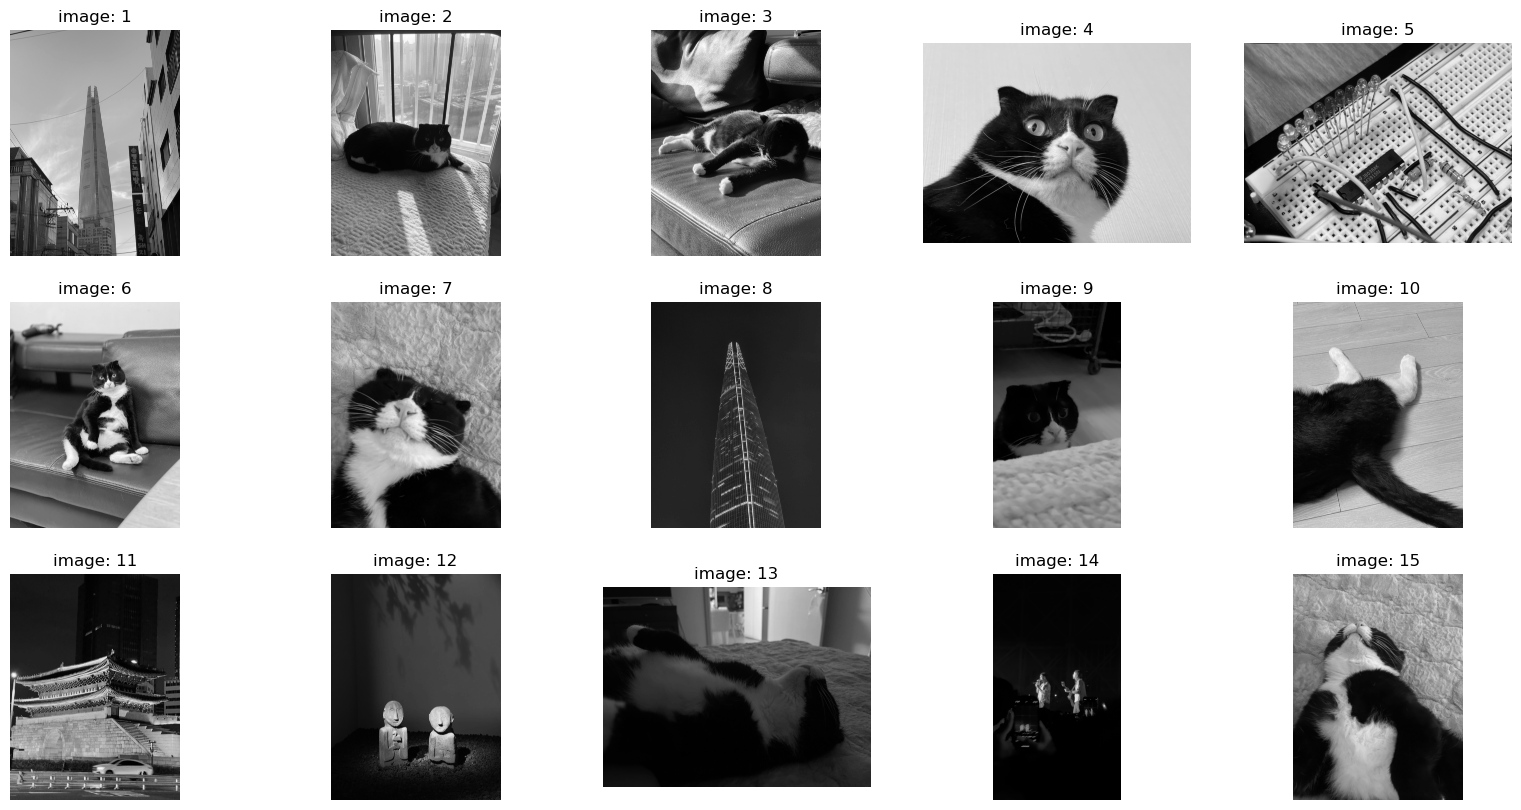

In [2]:
images_path = glob('./sample_image/*.jpeg')

fig, axes = plt.subplots(3, 5, figsize=(20, 10))

for idx, (img_path, ax) in enumerate(zip(images_path, axes.flat)):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    ax.imshow(image, cmap='gray')
    ax.set_title(f'image: {idx+1}')
    ax.axis('off')
    ax.grid('off')

plt.show()

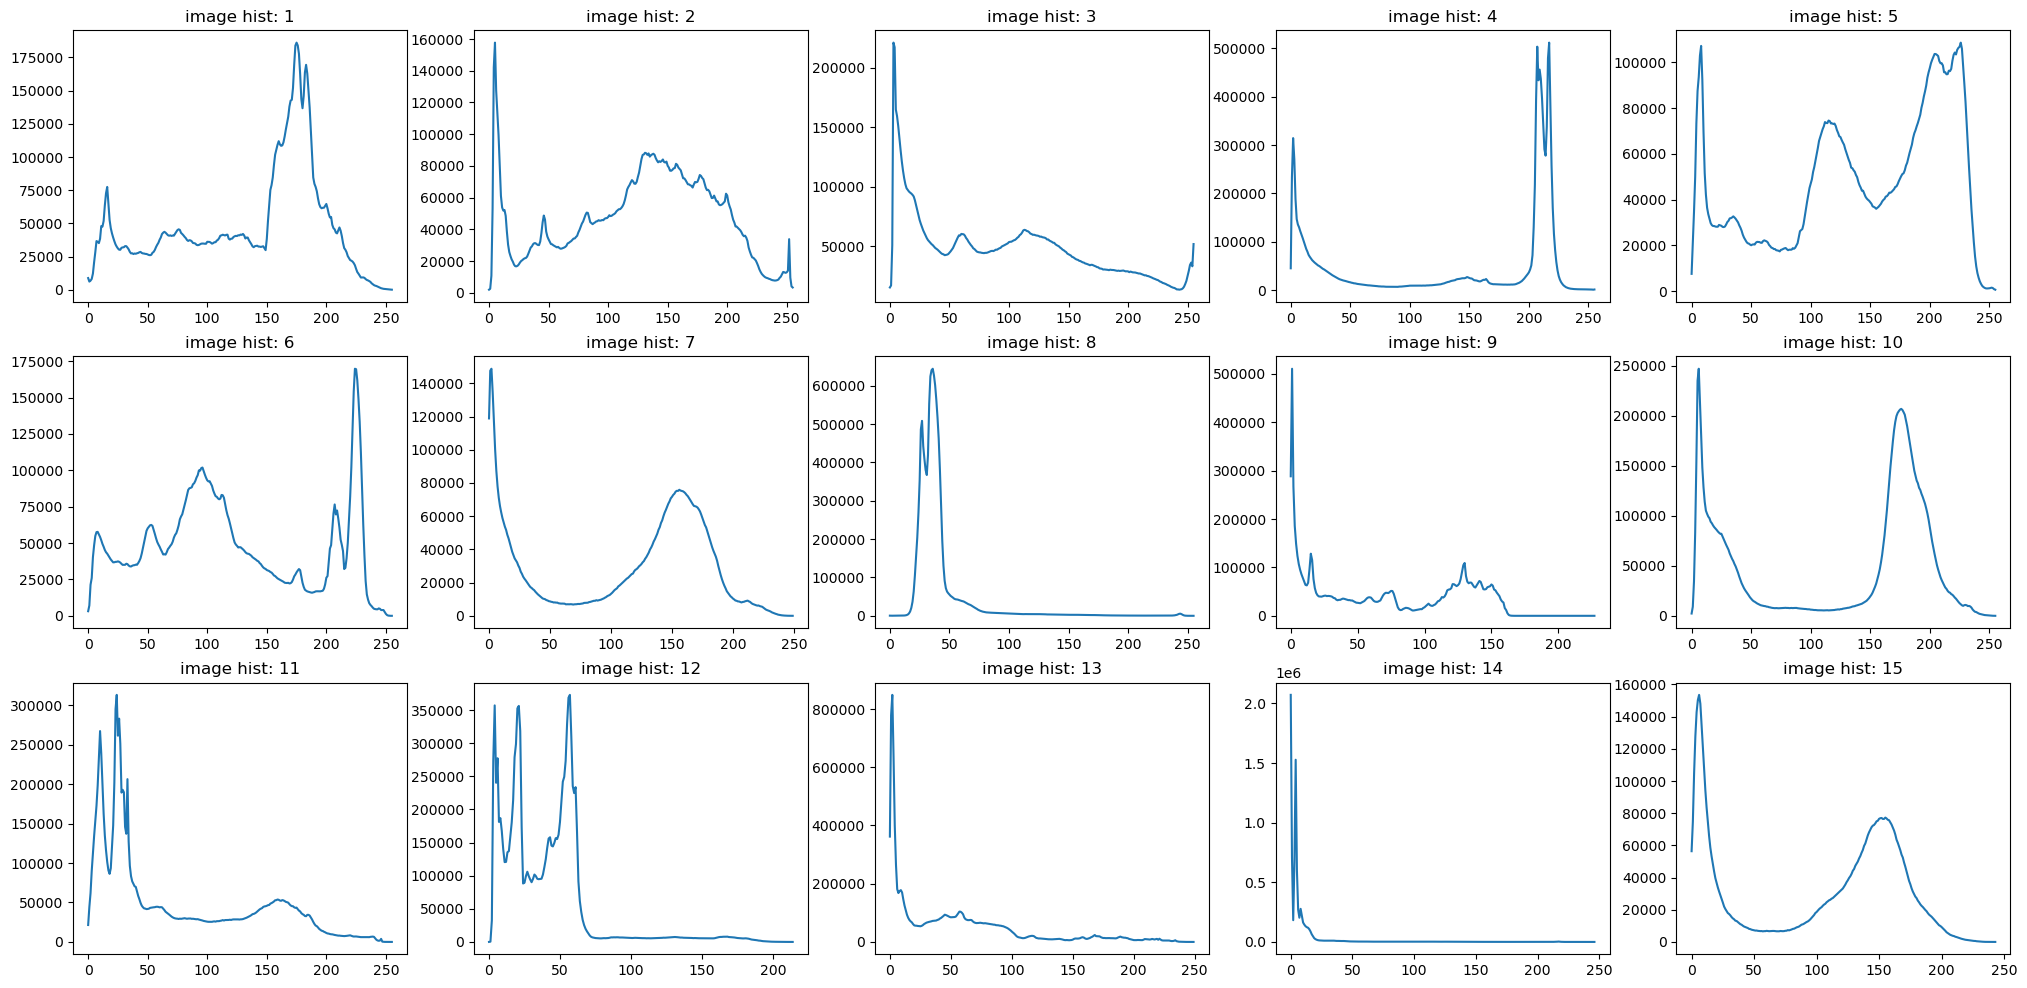

In [3]:
fig, axes = plt.subplots(3, 5, figsize=(25, 12))

for idx, (img_path, ax) in enumerate(zip(images_path, axes.flat)):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    ax.plot(np.bincount(image.reshape(-1)))
    ax.set_title(f'image hist: {idx+1}')

plt.show()

히스토그램 값이 너무 커서 log를 취해 스케일을 조정합니다.

/var/folders/5t/dz__90nj7kj5dl4r4bt3s3hc0000gn/T/ipykernel_75554/1154583321.py:8: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(np.bincount(image.reshape(-1))))


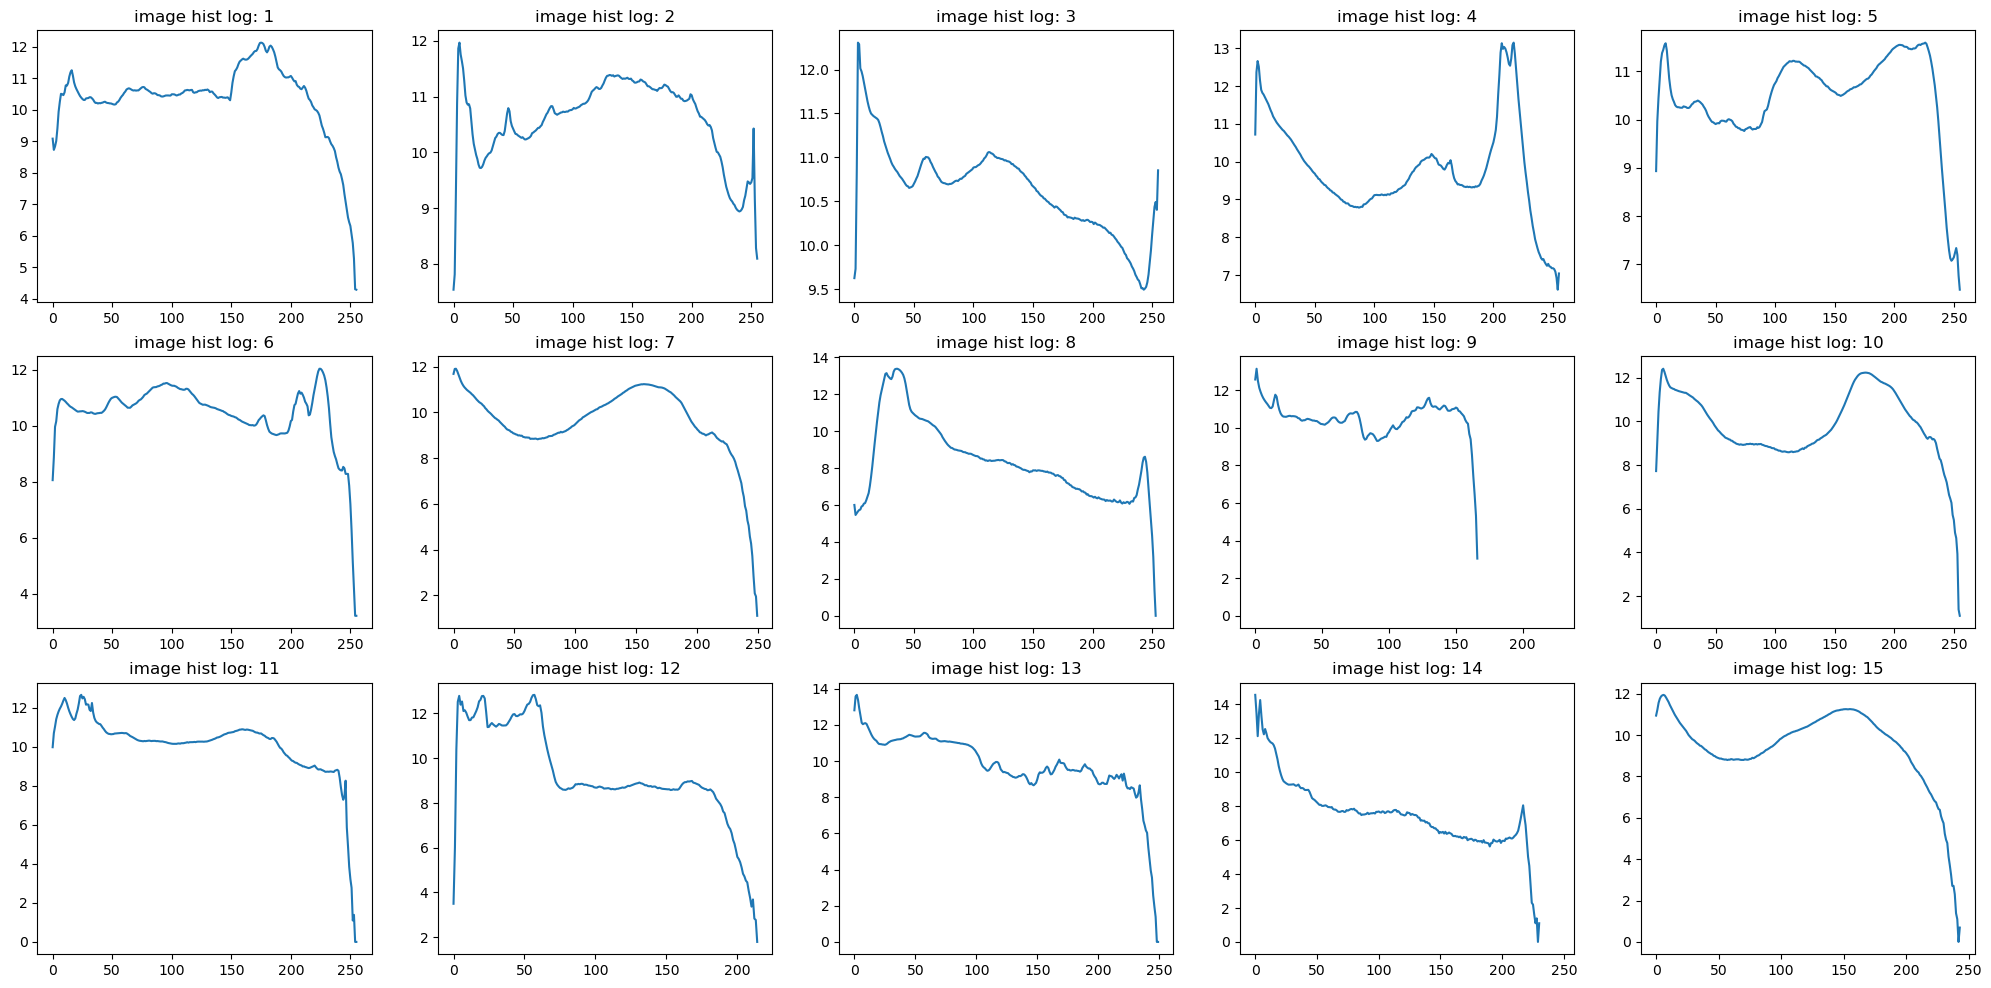

In [4]:
fig, axes = plt.subplots(3, 5, figsize=(25, 12))

# plt.figure(figsize=(image.shape[1] / 700, image.shape[0] / 700))

for idx, (img_path, ax) in enumerate(zip(images_path, axes.flat)):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    ax.plot(np.log(np.bincount(image.reshape(-1))))
    ax.set_title(f'image hist log: {idx+1}')

plt.show()

히스토그램 분포를 일종의 연속함수로 생각하고 극대, 극소값을 찾아 이진화처리를 해보겠습니다.

그 전에 비교를 위해 OTSU 알고리즘을 통해 샘플 이미지의 이진 영상 처리 결과를 확인해보겠습니다.

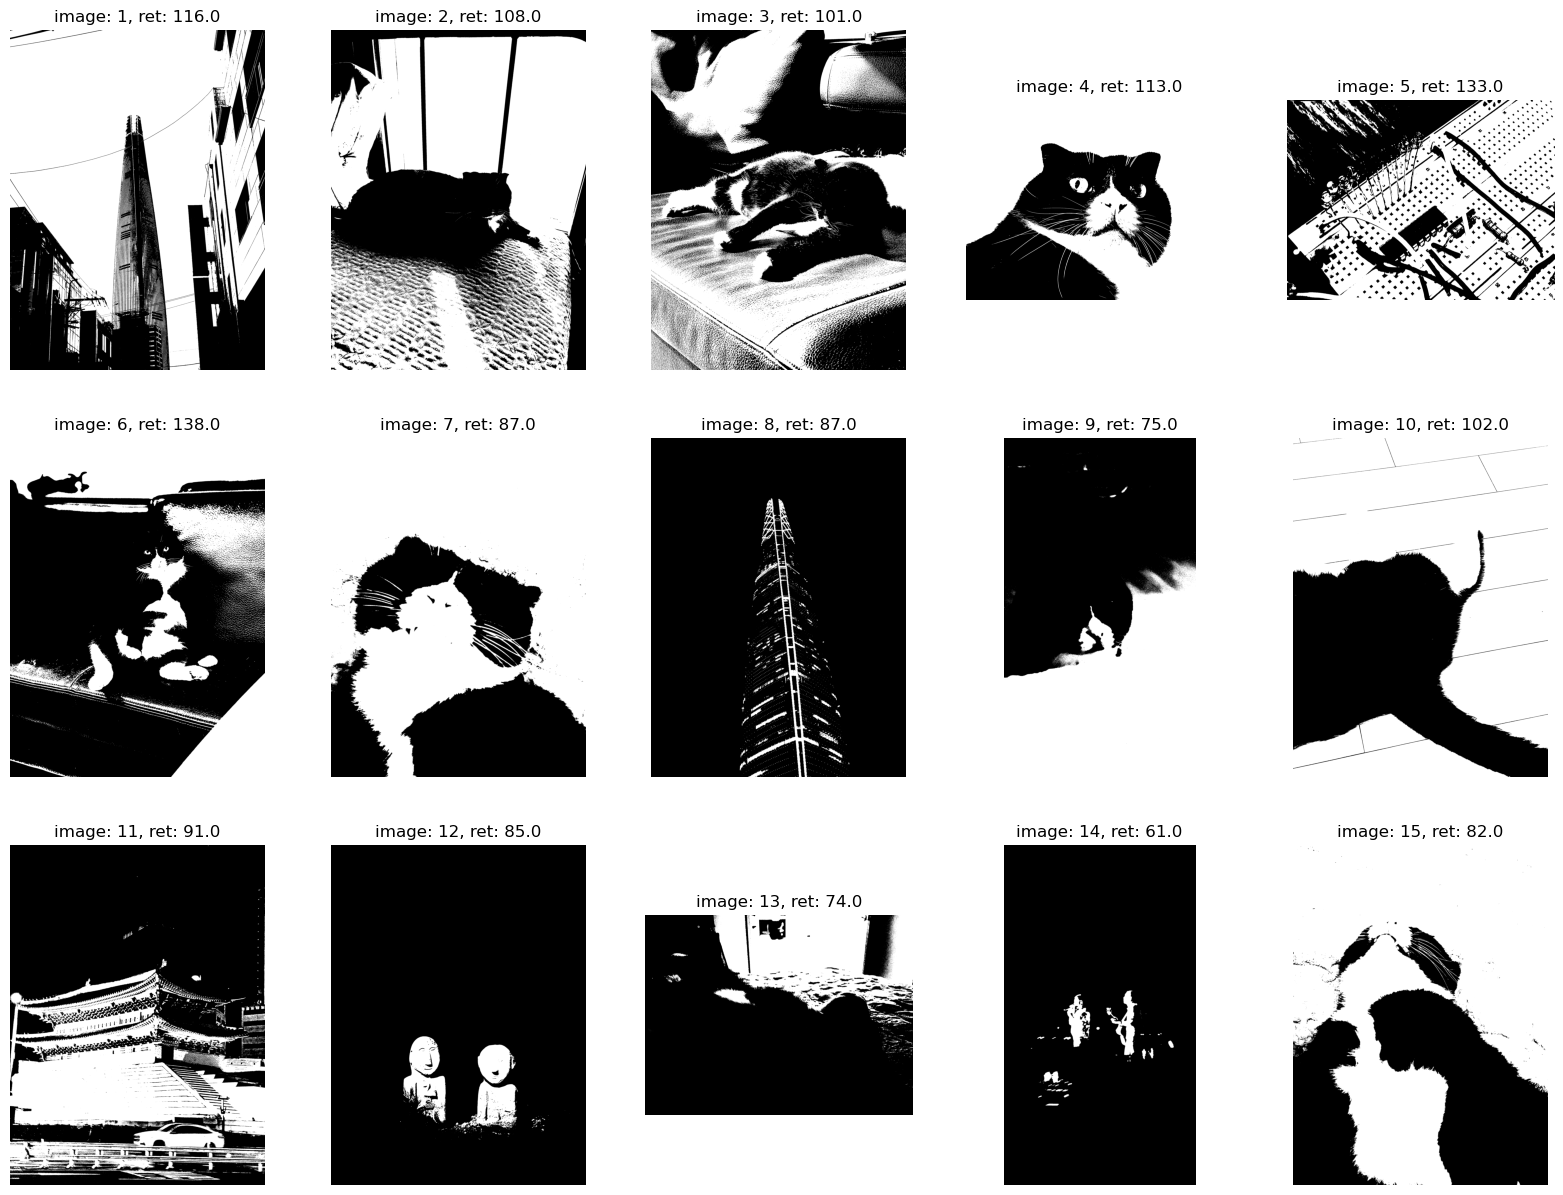

In [5]:
fig, axes = plt.subplots(3, 5, figsize=(20, 15))

for idx, (img_path, ax) in enumerate(zip(images_path, axes.flat)):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    ret, otsu_image = cv2.threshold(image, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    ax.imshow(otsu_image, cmap='gray')
    ax.axis('off')
    ax.grid('off')
    ax.set_title(f'image: {idx+1}, ret: {ret}')

plt.show()

In [6]:
def get_threshold_value(histograms):
    calc_diff = np.zeros(shape=(255, 2))
    changed_point = []

    for i in range(len(histograms)-1):
        calc_diff[i, 0] = i
        calc_diff[i, 1] = histograms[i+1] - histograms[i]

    for i in range(len(histograms)-2):
        if calc_diff[i, 1] * calc_diff[i+1, 1] < 0:
            changed_point.append([i, calc_diff[i, 1] * calc_diff[i+1, 1]])

    return int(sorted(changed_point, key=lambda x: x[1])[-1][0])

/var/folders/5t/dz__90nj7kj5dl4r4bt3s3hc0000gn/T/ipykernel_75554/3455578342.py:6: RuntimeWarning: divide by zero encountered in log
  hist = np.log(np.bincount(image.reshape(-1)))
/var/folders/5t/dz__90nj7kj5dl4r4bt3s3hc0000gn/T/ipykernel_75554/2250329504.py:7: RuntimeWarning: invalid value encountered in double_scalars
  calc_diff[i, 1] = histograms[i+1] - histograms[i]


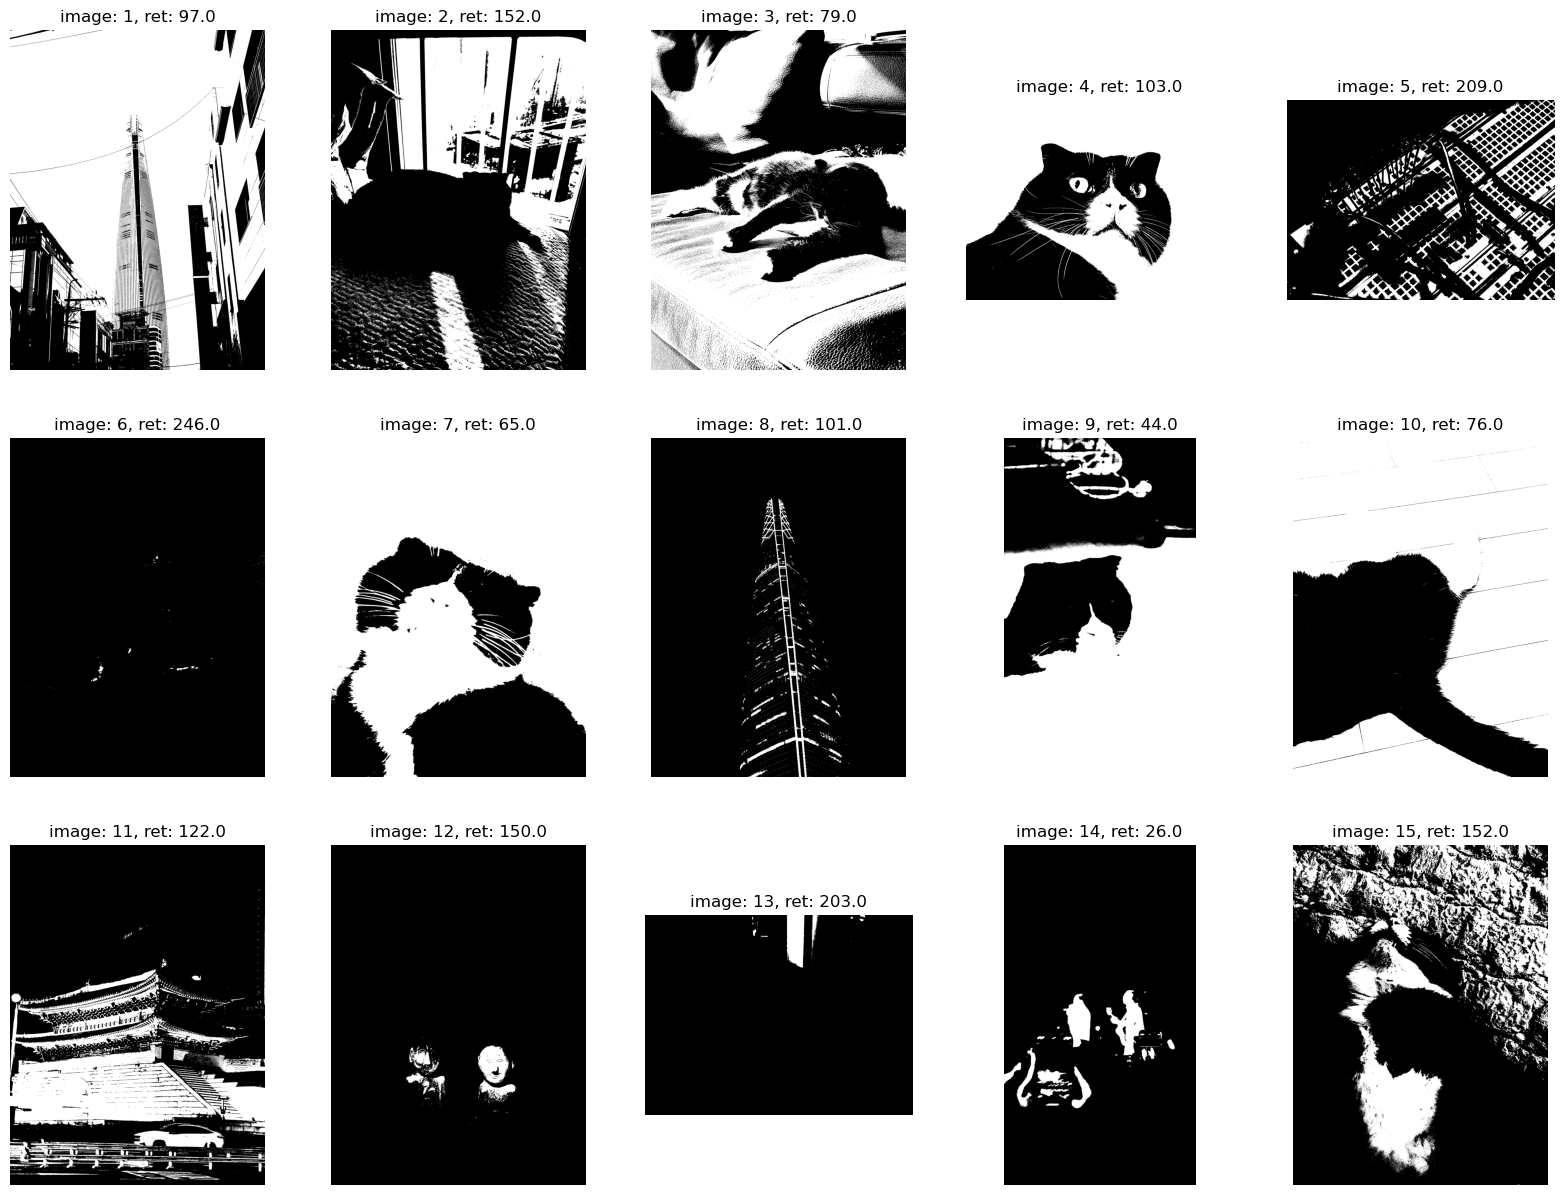

In [7]:
fig, axes = plt.subplots(3, 5, figsize=(20, 15))

for idx, (img_path, ax) in enumerate(zip(images_path, axes.flat)):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    hist = np.log(np.bincount(image.reshape(-1)))
    thresh_value = get_threshold_value(hist)
    ret, mine_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)

    ax.imshow(mine_image, cmap='gray')
    ax.axis('off')
    ax.grid('off')
    ax.set_title(f'image: {idx+1}, ret: {ret}')

plt.show()

OTSU와 서로 다른 결과를 보이는 이미지는 6번, 9번, 12번, 13번, 14번, 15번 입니다.

6번 이미지의 경우 제 방식은 246을 thresh 값으로, OTSU는 138을 그 값으로 선정했습니다.

14번 이미지의 경우 OTSU에서는 그림자에 가려진 부분은 다소 분리해내지 못한 결과를 보이나 제 방식에서는 그림자에 가려진 부분도 분리했습니다.

다만 원하지 않는 부분(사진 찍는 손)은 분리하지 못했습니다.

/var/folders/5t/dz__90nj7kj5dl4r4bt3s3hc0000gn/T/ipykernel_75554/759152692.py:46: RuntimeWarning: divide by zero encountered in log
  log_hist = np.log(np.bincount(image.reshape(-1)))
/var/folders/5t/dz__90nj7kj5dl4r4bt3s3hc0000gn/T/ipykernel_75554/2250329504.py:7: RuntimeWarning: invalid value encountered in double_scalars
  calc_diff[i, 1] = histograms[i+1] - histograms[i]


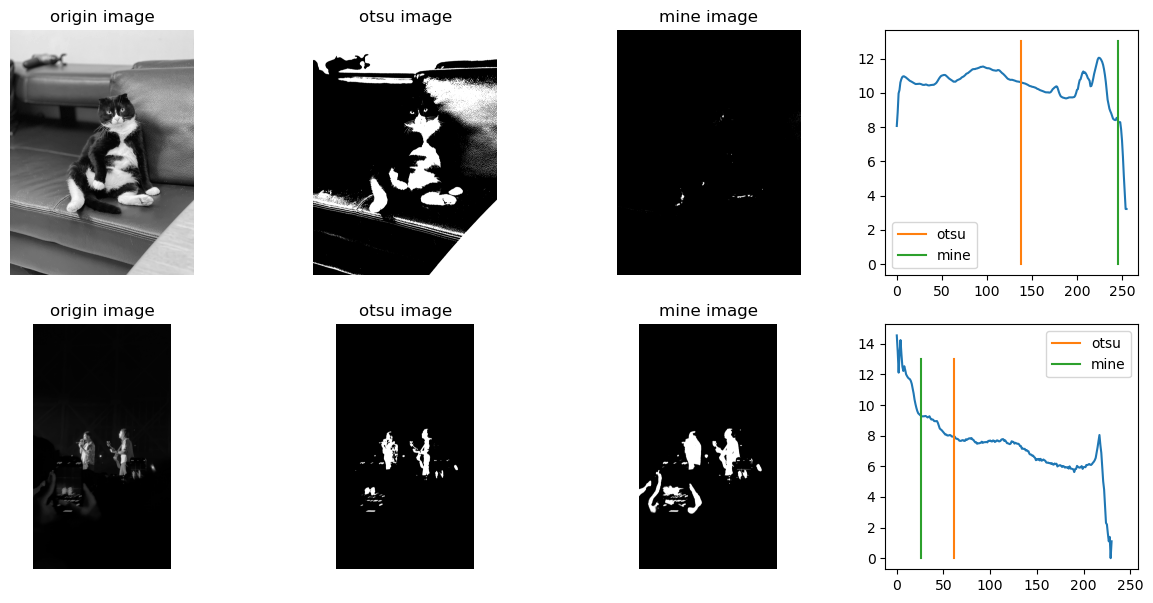

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7))

image = cv2.imread(images_path[5], cv2.IMREAD_GRAYSCALE)
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('origin image')
axes[0, 0].axis('off')
axes[0, 0].grid('off')


o_ret, otsu_image = cv2.threshold(image, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
axes[0, 1].imshow(otsu_image, cmap='gray')
axes[0, 1].set_title('otsu image')
axes[0, 1].axis('off')
axes[0, 1].grid('off')


log_hist = np.log(np.bincount(image.reshape(-1)))
thresh_value = get_threshold_value(log_hist)
m_ret, mine_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)

axes[0, 2].imshow(mine_image, cmap='gray')
axes[0, 2].set_title('mine image')
axes[0, 2].axis('off')
axes[0, 2].grid('off')


axes[0, 3].plot(log_hist)
axes[0, 3].plot([o_ret, o_ret], [0, 13], label='otsu')
axes[0, 3].plot([m_ret, m_ret], [0, 13], label='mine')
axes[0, 3].legend()

image = cv2.imread(images_path[13], cv2.IMREAD_GRAYSCALE)
axes[1, 0].imshow(image, cmap='gray')
axes[1, 0].set_title('origin image')
axes[1, 0].axis('off')
axes[1, 0].grid('off')


o_ret, otsu_image = cv2.threshold(image, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
axes[1, 1].imshow(otsu_image, cmap='gray')
axes[1, 1].set_title('otsu image')
axes[1, 1].axis('off')
axes[1, 1].grid('off')


log_hist = np.log(np.bincount(image.reshape(-1)))
thresh_value = get_threshold_value(log_hist)
m_ret, mine_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)

axes[1, 2].imshow(mine_image, cmap='gray')
axes[1, 2].set_title('mine image')
axes[1, 2].axis('off')
axes[1, 2].grid('off')


axes[1, 3].plot(log_hist)
axes[1, 3].plot([o_ret, o_ret], [0, 13], label='otsu')
axes[1, 3].plot([m_ret, m_ret], [0, 13], label='mine')
axes[1, 3].legend()
plt.show()